In [1]:
import os
from mgmt.data.nifti import make_subject
import torchio as tio
from mgmt.visualize.subject import plot_subject_with_label
import time
%load_ext autoreload
%autoreload 2

2023-08-06 22:41:32.181142: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 22:41:32.850351: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import time

class Timer:
    def __init__(self):
        self.start_time = None
        self.total_time = 0
        self.count = 0

    def start(self):
        if self.start_time is not None:
            raise Exception("Timer is already running")
        self.start_time = time.time()

    def stop(self):
        if self.start_time is None:
            raise Exception("Timer is not running")
        elapsed_time = time.time() - self.start_time
        self.total_time += elapsed_time
        self.count += 1
        self.start_time = None

    def average(self):
        if self.count == 0:
            return 0
        return self.total_time / self.count


In [7]:
subject_folder = "/home/bryan/data/brain_tumor/caidm_3d_240/P-00228"

In [8]:
subject = make_subject(
    subject_folder,
) 

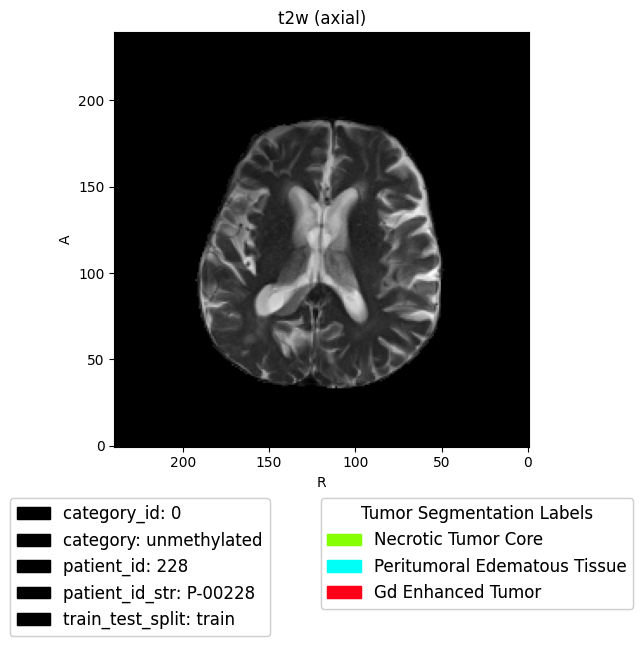

In [12]:
plot_subject_with_label(subject, show=True, add_metadata=True, add_tumor_legend=True, single_axis="axial", subject_include=["t2w"]);

In [13]:
tio.data.io._write_nibabel(
    subject.t2w.data,
    subject.t2w.affine,
    "/home/bryan/Downloads/2023-08-06/t2w.nii",
)

In [ ]:
tio.data.io._write_nibabel(
    subject.t2w.data,
    subject.t2w.affine,
    "/home/bryan/Downloads/2023-08-06/t2w.nii",
)

In [33]:
tio.data.io._write_sitk(
    subject.t2w.data,
    subject.t2w.affine,
    "/home/bryan/Downloads/2023-08-06/t2w-sitk.nii",
)

In [26]:
timer = Timer()
for _ in range(500):
    timer.start()
#     image = tio.ScalarImage(path="/home/bryan/Downloads/2023-08-06/t2w.nii")
#     image = tio.ScalarImage(path="/home/bryan/data/brain_tumor/caidm_3d_240/P-00228/t2w.nii.gz")
    image = tio.ScalarImage(path="/home/bryan/data/brain_tumor/caidm_3d_240/P-00228/t2w.skull-crop-64.nii")
    image.load()
    timer.stop()
print(timer.average()*1000)

97.00267696380615


In [ ]:
# sitk: 19.855412006378174
# nibabel: 19.383499145507812
# original t2w.nii: 20.127614974975586
# original t2w.nii.gz: 23.976966381072998
# skull-crop-64.nii: 97.00267696380615

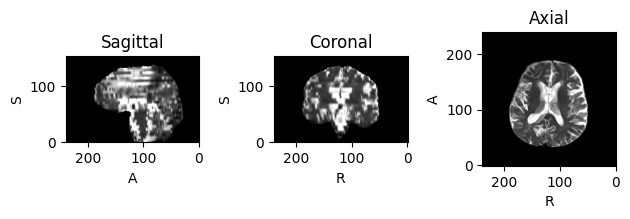

In [39]:
image.plot()